In [10]:
import sys
import scanpy as sc
import pandas as pd
import numpy as np
from DeepTCR.DeepTCR import DeepTCR_U

# Instantiate training object
DTCRU = DeepTCR_U('Vaccine Response')

# #Load Data from directories
# DTCRU.Get_Data(directory='../Data/Murine_Antigens',Load_Prev_Data=False,aggregate_by_aa=True,
#                aa_column_beta=0,count_column=1,v_beta_column=2,j_beta_column=3)

In [6]:
path_data = '../../../data/02_dex_annotated_cd8.h5ad'
adata = sc.read(path_data)
adata

AnnData object with n_obs × n_vars = 53907 × 18471
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'LTDEMIAQY', 'YTN

In [7]:
# Drop rows where 'IR_VDJ_1_junction_aa' (beta_sequences) is NaN
adata_filtered = adata[~adata.obs['IR_VDJ_1_junction_aa'].isna()].copy()

In [13]:
# Extract beta sequences, v_beta, d_beta, j_beta, class labels, and sample labels from AnnData object
beta_sequences = np.asarray(adata_filtered.obs['IR_VDJ_1_junction_aa'])  # Amino acid junction for beta chain
v_beta = np.asarray(adata_filtered.obs['IR_VDJ_1_v_call'])  # V gene for beta chain
d_beta = np.asarray(adata_filtered.obs['IR_VDJ_1_d_call'])  # D gene for beta chain (if applicable)
j_beta = np.asarray(adata_filtered.obs['IR_VDJ_1_j_call'])  # J gene for beta chain
class_labels = np.asarray(adata_filtered.obs['leiden_CD8'])  # Assuming 'celltype' contains class labels
sample_labels = np.asarray(adata_filtered.obs['sample'])  # Assuming 'sample' contains sample IDs

# Load data into DTCRU
DTCRU.Load_Data(
    beta_sequences=beta_sequences,
    v_beta=v_beta,
    j_beta=j_beta,
    class_labels=class_labels,
    sample_labels=sample_labels
)

Data Loaded


In [14]:
from DeepTCR.DeepTCR import DeepTCR_SS

In [15]:
# Instantiate training object
DTCR_SS = DeepTCR_SS('Vaccine Supervised')

In [16]:
# Load data into DTCRU
DTCR_SS.Load_Data(
    beta_sequences=beta_sequences,
    v_beta=v_beta,
    j_beta=j_beta,
    class_labels=class_labels,
    sample_labels=sample_labels
)

Data Loaded


In [17]:
DTCR_SS.Get_Train_Valid_Test(test_size=0.25)
DTCR_SS.Train()

/home/tria/miniconda3/envs/deeptcr/lib/python3.7/site-packages/DeepTCR/functions/Layers.py:106: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  kernel_regularizer=tf.keras.regularizers.l2(l2_reg))
/home/tria/miniconda3/envs/deeptcr/lib/python3.7/site-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/home/tria/miniconda3/envs/deeptcr/lib/python3.7/site-packages/DeepTCR/functions/Layers.py:107: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  conv_out = tf.compat.v1.layers.flatten(tf.reduce_max(input_tensor=conv, axis=2))
/home/tria/miniconda3/envs/deeptcr/lib/python3.7/site-packages/keras/legacy_tf_layers/core.py:523: UserWarning: `layer.apply` is deprecated a


Training_Statistics: 
 Epoch: 1 Training loss: 2.12192 Validation loss: 1.98311 Testing loss: 1.96648 Training Accuracy: 0.287 Validation Accuracy: 0.33343 Testing AUC: 0.70039
Training_Statistics: 
 Epoch: 2 Training loss: 1.75892 Validation loss: 1.77273 Testing loss: 1.74489 Training Accuracy: 0.41207 Validation Accuracy: 0.40929 Testing AUC: 0.75058
Training_Statistics: 
 Epoch: 3 Training loss: 1.61921 Validation loss: 1.67205 Testing loss: 1.64969 Training Accuracy: 0.45464 Validation Accuracy: 0.45068 Testing AUC: 0.77456
Training_Statistics: 
 Epoch: 4 Training loss: 1.53681 Validation loss: 1.60213 Testing loss: 1.57713 Training Accuracy: 0.4867 Validation Accuracy: 0.46567 Testing AUC: 0.78861
Training_Statistics: 
 Epoch: 5 Training loss: 1.47714 Validation loss: 1.55392 Testing loss: 1.53670 Training Accuracy: 0.50795 Validation Accuracy: 0.4887 Testing AUC: 0.79355
Training_Statistics: 
 Epoch: 6 Training loss: 1.43670 Validation loss: 1.52066 Testing loss: 1.49992 Traini

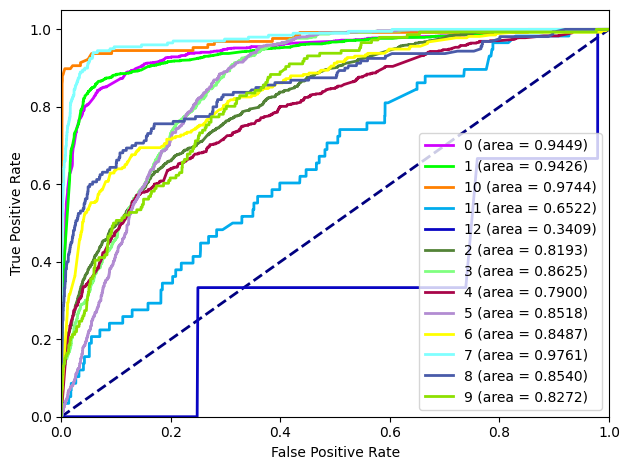

In [18]:
DTCR_SS.AUC_Curve()

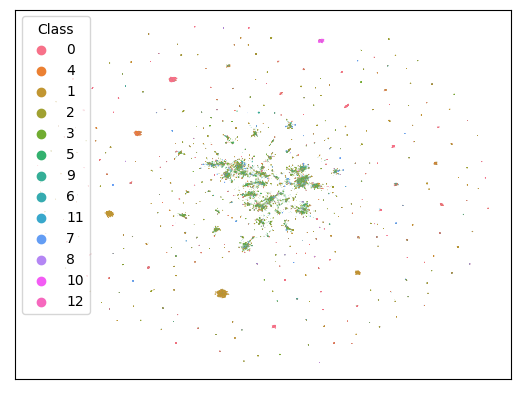

In [19]:
DTCR_SS.UMAP_Plot(by_class=True,freq_weight=True,scale=1000)

In [20]:
DTCR_SS.K_Fold_CrossVal(folds=5)

/home/tria/miniconda3/envs/deeptcr/lib/python3.7/site-packages/DeepTCR/functions/Layers.py:106: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  kernel_regularizer=tf.keras.regularizers.l2(l2_reg))
/home/tria/miniconda3/envs/deeptcr/lib/python3.7/site-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/home/tria/miniconda3/envs/deeptcr/lib/python3.7/site-packages/DeepTCR/functions/Layers.py:107: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  conv_out = tf.compat.v1.layers.flatten(tf.reduce_max(input_tensor=conv, axis=2))
/home/tria/miniconda3/envs/deeptcr/lib/python3.7/site-packages/keras/legacy_tf_layers/core.py:523: UserWarning: `layer.apply` is deprecated a

Fold 0



2025-01-09 14:15:59.851678: W tensorflow/core/common_runtime/colocation_graph.cc:1218] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
  /job:localhost/replica:0/task:0/device:CPU:0].
See below for details of this colocation group:
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_device_name_='' resource_device_name_='/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
ResourceApplyAdam: CPU 
AssignVariableOp: CPU 
RandomUniform: CPU 
Fill: CPU 
VarIsInitializedOp: CPU 
Const: CPU 
Mul: CPU 
ReadVariableOp: CPU 
Sub: CPU 
VarHandleOp: CPU 
AddV2: CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  Embedding_V_beta/Initi

Training_Statistics: 
 Epoch: 1 Training loss: 2.17160 Validation loss: 1.92576 Testing loss: 1.93491 Training Accuracy: 0.27669 Validation Accuracy: 0.33757 Testing AUC: 0.66433
Training_Statistics: 
 Epoch: 2 Training loss: 1.82620 Validation loss: 1.68944 Testing loss: 1.71253 Training Accuracy: 0.38631 Validation Accuracy: 0.43901 Testing AUC: 0.73317
Training_Statistics: 
 Epoch: 3 Training loss: 1.65605 Validation loss: 1.58915 Testing loss: 1.61324 Training Accuracy: 0.44087 Validation Accuracy: 0.47354 Testing AUC: 0.75468
Training_Statistics: 
 Epoch: 4 Training loss: 1.57232 Validation loss: 1.52674 Testing loss: 1.54816 Training Accuracy: 0.47157 Validation Accuracy: 0.48649 Testing AUC: 0.76422
Training_Statistics: 
 Epoch: 5 Training loss: 1.51528 Validation loss: 1.49142 Testing loss: 1.51294 Training Accuracy: 0.49449 Validation Accuracy: 0.49798 Testing AUC: 0.7648
Training_Statistics: 
 Epoch: 6 Training loss: 1.47361 Validation loss: 1.45030 Testing loss: 1.47454 Trai

2025-01-09 14:16:45.406441: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-09 14:16:45.409107: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-01-09 14:16:45.417060: W tensorflow/core/common_runtime/colocation_graph.cc:1218] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
  /job:localhost/replica:0/task:0/device:CPU:0].
See below for

Training_Statistics: 
 Epoch: 1 Training loss: 2.17763 Validation loss: 1.95750 Testing loss: 1.97100 Training Accuracy: 0.25018 Validation Accuracy: 0.31431 Testing AUC: 0.64386
Training_Statistics: 
 Epoch: 2 Training loss: 1.85659 Validation loss: 1.74244 Testing loss: 1.75496 Training Accuracy: 0.37274 Validation Accuracy: 0.41457 Testing AUC: 0.70472
Training_Statistics: 
 Epoch: 3 Training loss: 1.68707 Validation loss: 1.62727 Testing loss: 1.64227 Training Accuracy: 0.4373 Validation Accuracy: 0.45391 Testing AUC: 0.74806
Training_Statistics: 
 Epoch: 4 Training loss: 1.58950 Validation loss: 1.55362 Testing loss: 1.56920 Training Accuracy: 0.47036 Validation Accuracy: 0.47839 Testing AUC: 0.76777
Training_Statistics: 
 Epoch: 5 Training loss: 1.52202 Validation loss: 1.50737 Testing loss: 1.51708 Training Accuracy: 0.49557 Validation Accuracy: 0.50253 Testing AUC: 0.77892
Training_Statistics: 
 Epoch: 6 Training loss: 1.47068 Validation loss: 1.47648 Testing loss: 1.48258 Trai

Test: 0 = 0.94, 1 = 0.94, 10 = 0.97, 11 = 0.66, 12 = 0.44, 2 = 0.82, 3 = 0.86, 4 = 0.79, 5 = 0.84, 6 = 0.81, 7 = 0.96, 8 = 0.85, 9 = 0.84, 


Fold 2



2025-01-09 14:17:31.261486: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-09 14:17:31.263994: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-01-09 14:17:31.271967: W tensorflow/core/common_runtime/colocation_graph.cc:1218] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
  /job:localhost/replica:0/task:0/device:CPU:0].
See below for

Training_Statistics: 
 Epoch: 1 Training loss: 2.14451 Validation loss: 1.95371 Testing loss: 1.94840 Training Accuracy: 0.28716 Validation Accuracy: 0.31806 Testing AUC: 0.67443
Training_Statistics: 
 Epoch: 2 Training loss: 1.83086 Validation loss: 1.72814 Testing loss: 1.73231 Training Accuracy: 0.38222 Validation Accuracy: 0.42459 Testing AUC: 0.72986
Training_Statistics: 
 Epoch: 3 Training loss: 1.66366 Validation loss: 1.61174 Testing loss: 1.62095 Training Accuracy: 0.44108 Validation Accuracy: 0.45268 Testing AUC: 0.7654
Training_Statistics: 
 Epoch: 4 Training loss: 1.57878 Validation loss: 1.55035 Testing loss: 1.56046 Training Accuracy: 0.47101 Validation Accuracy: 0.47748 Testing AUC: 0.78148
Training_Statistics: 
 Epoch: 5 Training loss: 1.52010 Validation loss: 1.49917 Testing loss: 1.50722 Training Accuracy: 0.49416 Validation Accuracy: 0.50029 Testing AUC: 0.79252
Training_Statistics: 
 Epoch: 6 Training loss: 1.47563 Validation loss: 1.46495 Testing loss: 1.47286 Trai

2025-01-09 14:18:17.620926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-09 14:18:17.622789: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-01-09 14:18:17.630961: W tensorflow/core/common_runtime/colocation_graph.cc:1218] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
  /job:localhost/replica:0/task:0/device:CPU:0].
See below for

Training_Statistics: 
 Epoch: 1 Training loss: 2.12777 Validation loss: 1.93085 Testing loss: 1.93915 Training Accuracy: 0.28472 Validation Accuracy: 0.33013 Testing AUC: 0.66298
Training_Statistics: 
 Epoch: 2 Training loss: 1.80437 Validation loss: 1.71654 Testing loss: 1.72093 Training Accuracy: 0.39815 Validation Accuracy: 0.42595 Testing AUC: 0.71388
Training_Statistics: 
 Epoch: 3 Training loss: 1.64416 Validation loss: 1.61727 Testing loss: 1.61764 Training Accuracy: 0.44681 Validation Accuracy: 0.45957 Testing AUC: 0.74403
Training_Statistics: 
 Epoch: 4 Training loss: 1.55442 Validation loss: 1.54890 Testing loss: 1.54774 Training Accuracy: 0.47943 Validation Accuracy: 0.48019 Testing AUC: 0.76305
Training_Statistics: 
 Epoch: 5 Training loss: 1.48814 Validation loss: 1.50844 Testing loss: 1.50915 Training Accuracy: 0.50683 Validation Accuracy: 0.49627 Testing AUC: 0.77586
Training_Statistics: 
 Epoch: 6 Training loss: 1.44613 Validation loss: 1.47205 Testing loss: 1.47640 Tra

2025-01-09 14:19:02.181500: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-09 14:19:02.187733: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-01-09 14:19:02.196040: W tensorflow/core/common_runtime/colocation_graph.cc:1218] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
  /job:localhost/replica:0/task:0/device:CPU:0].
See below for


Training_Statistics: 
 Epoch: 1 Training loss: 2.18684 Validation loss: 1.96550 Testing loss: 1.94923 Training Accuracy: 0.26487 Validation Accuracy: 0.33338 Testing AUC: 0.65284
Training_Statistics: 
 Epoch: 2 Training loss: 1.83938 Validation loss: 1.74273 Testing loss: 1.70868 Training Accuracy: 0.38458 Validation Accuracy: 0.40517 Testing AUC: 0.70492
Training_Statistics: 
 Epoch: 3 Training loss: 1.66892 Validation loss: 1.63825 Testing loss: 1.59823 Training Accuracy: 0.43676 Validation Accuracy: 0.43908 Testing AUC: 0.73465
Training_Statistics: 
 Epoch: 4 Training loss: 1.58039 Validation loss: 1.56874 Testing loss: 1.53132 Training Accuracy: 0.46912 Validation Accuracy: 0.47952 Testing AUC: 0.75787
Training_Statistics: 
 Epoch: 5 Training loss: 1.51584 Validation loss: 1.52166 Testing loss: 1.48395 Training Accuracy: 0.49673 Validation Accuracy: 0.49439 Testing AUC: 0.77402
Training_Statistics: 
 Epoch: 6 Training loss: 1.47078 Validation loss: 1.48760 Testing loss: 1.44970 Tr

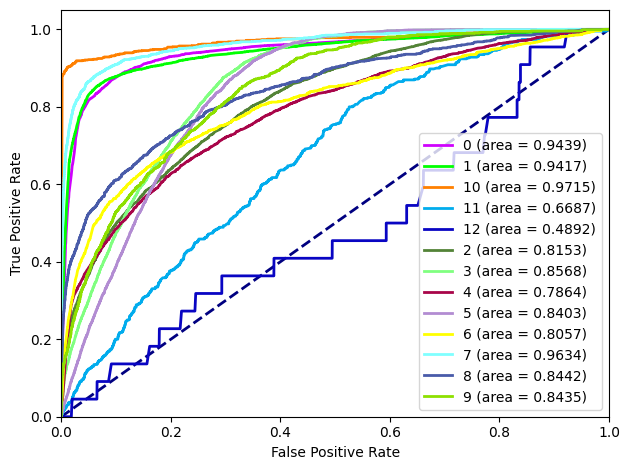

In [21]:
DTCR_SS.AUC_Curve()

In [ ]:
DTCR_SS.UMAP_Plot(by_class=True,freq_weight=True,scale=1000)